In [42]:
import pandas as pd
data = pd.read_csv("log_event.csv", delimiter=";")
data.head()

,heure,event,SM,AvAr,choc,detection_0_text,coef,Unnamed: 7,Vbatt,Iuser_int,...,T roll,T pitch,T kest X,T kest Y,T kest Z,T rp_risk1,T rp_risk2,Unnamed: 191,Unnamed: 192,1714
0,13:43:15.652,0,4,0,25,NOT_braquage_EnCours,64,NaN,1502,2487,...,-8.0,-7.0,-1140.0,-1267.0,9854.0,49.0,28.0,NaN,NaN,0.0
1,13:43:15.751,0,-7,-9,-1,NaN,0,NaN,1502,2487,...,-8.0,-7.0,-1293.0,-1414.0,9815.0,48.0,35.0,NaN,NaN,1.0
2,13:43:15.866,0,-7,-9,-1,NaN,3,NaN,1502,2487,...,-8.0,-7.0,-1311.0,-1388.0,9816.0,49.0,35.0,NaN,NaN,2.0
3,13:43:16.003,0,-7,-9,-1,NaN,8,NaN,1502,2487,...,-7.0,-10.0,-1831.0,-1176.0,9760.0,44.0,44.0,NaN,NaN,3.0
4,13:43:16.092,0,-7,-9,-1,NaN,16,NaN,1502,2487,...,-5.0,-12.0,-2019.0,-945.0,9748.0,50.0,46.0,NaN,NaN,4.0


In [44]:
data = data[['event','TAx', 'TAy', 'TAz', 'TGx', 'TGy', 'TGz', 'Iuser_int']]
data=(data-data.mean())/data.std()

In [35]:
data.head()
taille = len(data)

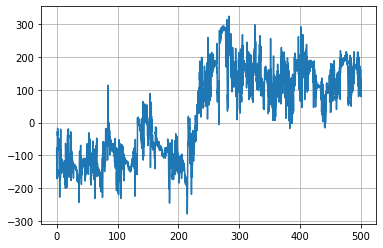

In [189]:
import numpy as np
t = np.linspace(0,500, taille)
plt.grid()
plt.plot(t, data.iloc[:,2])

In [219]:
from scipy.fft import fft
from scipy.signal.windows import hann
from scipy.signal import convolve
from scipy.fftpack import fftfreq

window = hann(7)
def tracerFFT(i):
    y = np.abs(data.iloc[:,i].dropna())
    y = convolve(window, y)
    y = fft(y)
    N = taille
    fs = 10
    T = 1/fs
    xf = np.linspace(0.0, 10000, N//2)
    plt.xlim([1,1000])
    plt.ylim([0,10000])
    plt.plot(xf,np.abs(y[0:N//2]))
    return None

def tracerFFTData(data, taille):
    signal = convolve(window, np.abs(data))
    N = taille
    fs=100
    Ts = 1.0/fs # sampling interval in time
    t = np.arange(0, taille, Ts) # time vector as scipy arange field / numpy.ndarray
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(int(N/2))] # one side FFT range
    freqs = fftfreq(signal.size, t[1]-t[0]) #t[1] - t[0], sample spacing
    freqs_side = freqs[range(int(N/2))] # one side frequency range
    #fig, ax = plt.subplots()
    plt.xlim([1,40])
    plt.ylim([0,35])
    plt.plot(freqs_side, FFT_side)
    
    return None

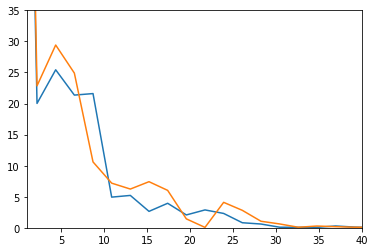

In [221]:
tracerFFTData(data.iloc[:,1][0:40], 40)
tracerFFTData(data.iloc[:,1][120:160], 40)

In [183]:
import time as t
def tracerFFTEvent():
    for i,j in data.iterrows():
        if j['event'] == 130:
            tracerFFTData(data['event'][i-30:i+30])

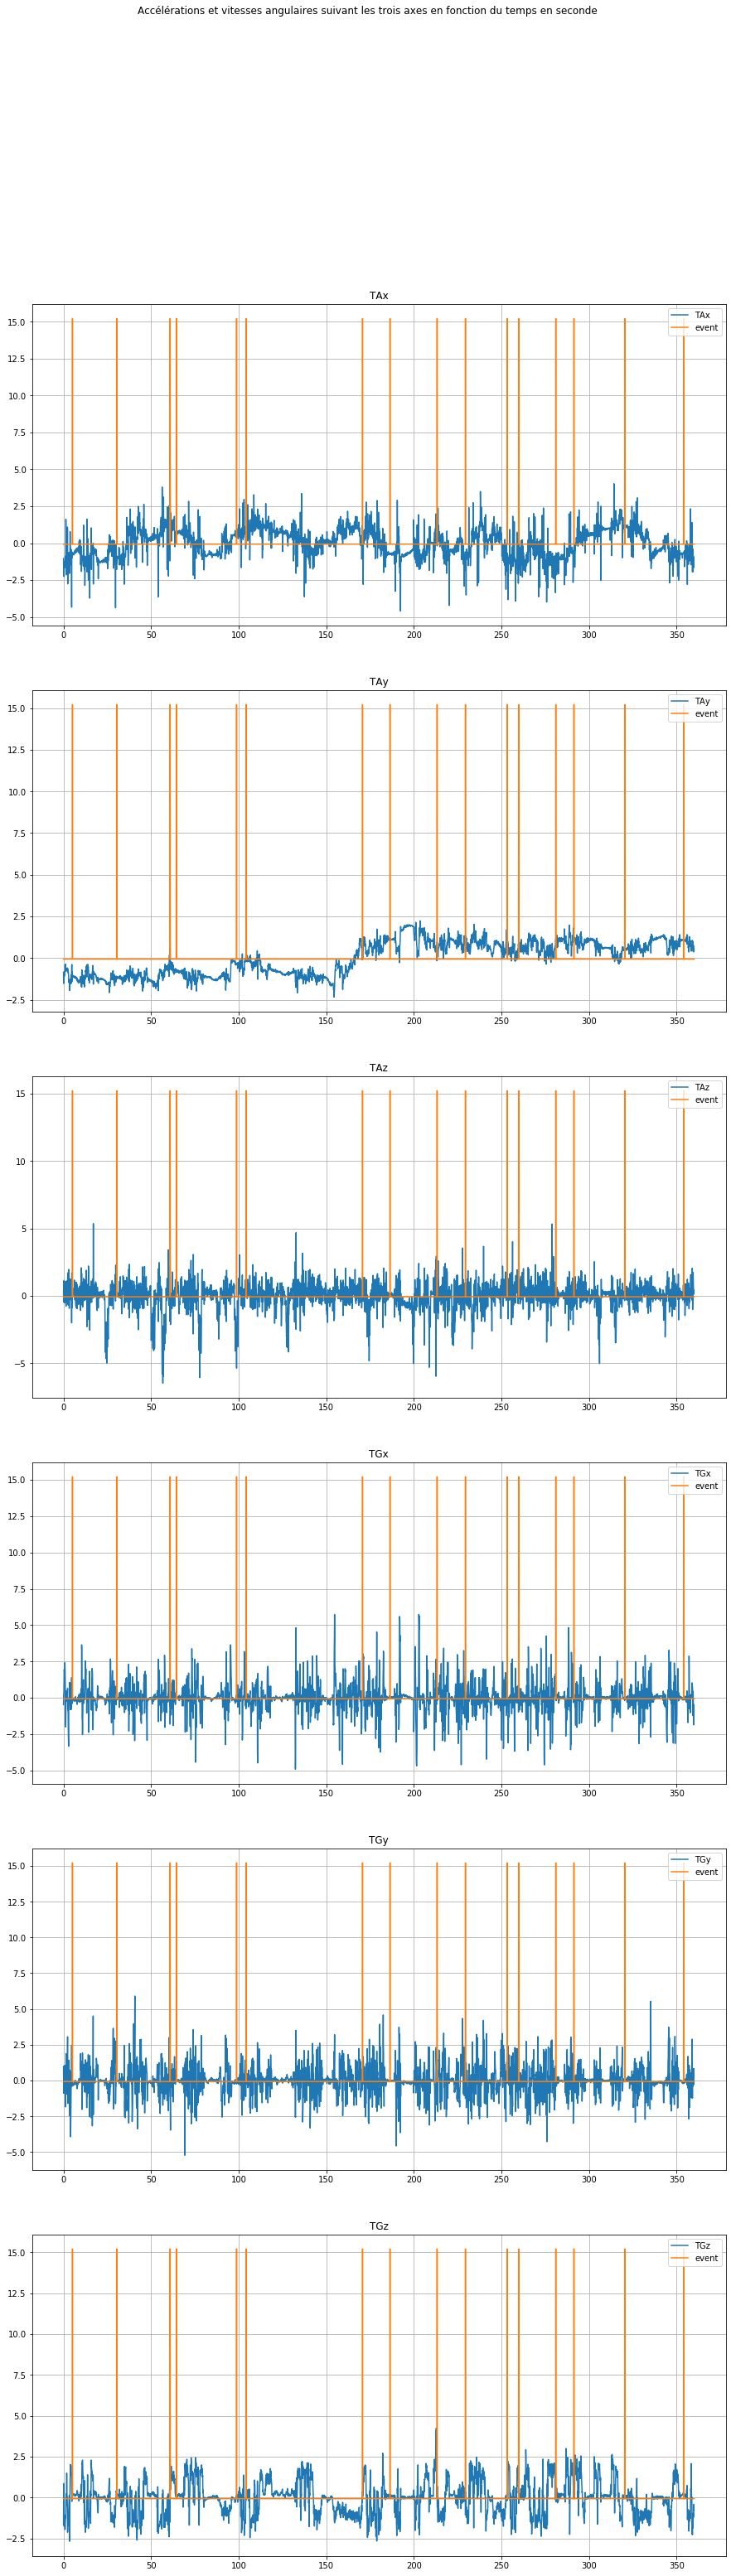

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6, figsize=(15,50))
fig.suptitle("Accélérations et vitesses angulaires suivant les trois axes en fonction du temps en seconde")
for i in range(6):
    ax[i].grid()
    ax[i].title.set_text((data.columns)[i+1])
    ax[i].plot(np.linspace(0,360,3721), data.iloc[:,i+1], label=data.columns[i+1])
    ax[i].plot(np.linspace(0,360,3721), data.iloc[:,0], label=data.columns[0])
    ax[i].legend(loc='upper right')

L'accélération selon l'axe $x$ semble la plus pertinente. Celle selon $y$ est compliquée à analyser d'autant plus que comme les essais ont été réalisés dans un terrain en pente, ca fausse les courbes.

## Plot de l'accélération selon $x$ et du courant consommé en fonction du temps

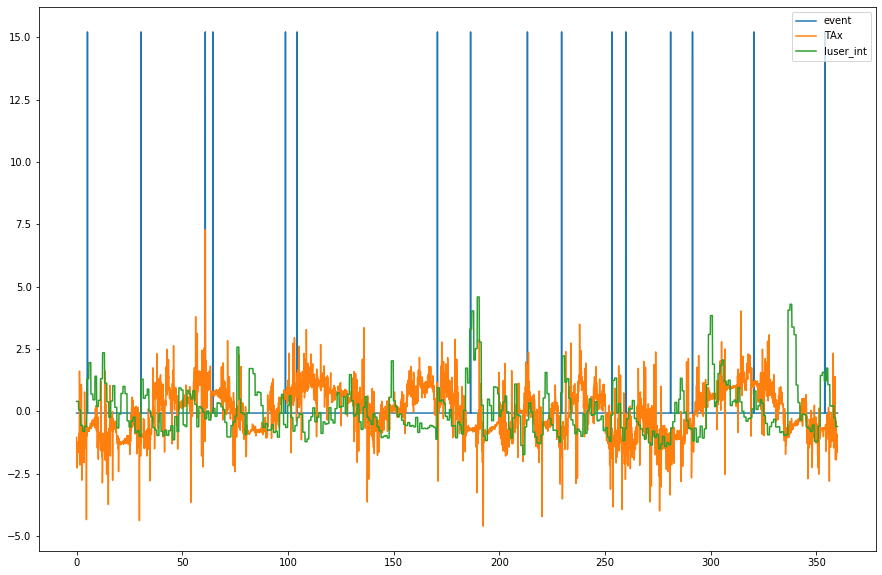

In [51]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(np.linspace(0,360,3721), data.iloc[:,0], label=data.columns[0])
ax.plot(np.linspace(0,360,3721), data.iloc[:,1],label=data.columns[1])
ax.plot(np.linspace(0,360,3721), data.iloc[:,-1], label=data.columns[-1])
ax.legend(loc='upper right')